### Задание 1

* Импортируйте библиотеки pandas, numpy и matplotlib.


* Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.


* Создайте датафреймы X и y из этих данных.


* Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)с помощью функции train_test_split так, чтобы размер тестовой выборкисоставлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.


* Масштабируйте данные с помощью StandardScaler.


* Постройте модель TSNE на тренировочный данных с параметрами:


* n_components=2, learning_rate=250, random_state=42.
 

* Постройте диаграмму рассеяния на этих данных.


In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [183]:
from sklearn.datasets import load_boston

In [184]:
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]

In [185]:
X = pd.DataFrame(data, columns = feature_names) 
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [186]:
target = boston["target"]
y = pd.DataFrame(target, columns=["price"])

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


In [188]:
from sklearn.preprocessing import StandardScaler

In [189]:
scaler = StandardScaler()

In [190]:
colnames = X.columns
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=colnames)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=colnames)

X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [191]:
%%time
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)
Wall time: 1.06 s


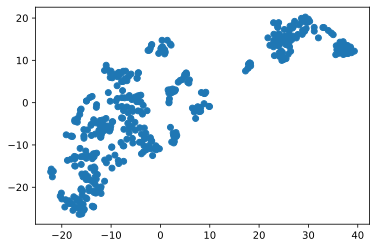

In [192]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2

* С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.


* Параметр max_iter должен быть равен 100, random_state сделайте равным 42.


* Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.


* Вычислите средние значения price и CRIM в разных кластерах.


In [193]:
from sklearn.cluster import KMeans

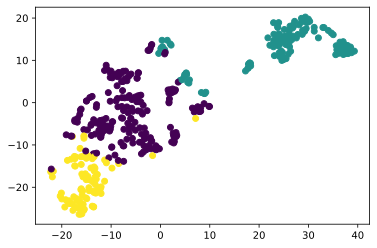

In [194]:
kmeans = KMeans(n_clusters = 3, max_iter=100, random_state = 42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [195]:
y_train[labels_train == 0].mean()

price    24.958115
dtype: float64

In [197]:
y_train[labels_train == 1].mean()

price    16.165354
dtype: float64

In [198]:
y_train[labels_train == 2].mean()

price    27.788372
dtype: float64

In [199]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.42166020942408367
Кластер 1: 10.797028425196853
Кластер 2: 0.07356558139534886


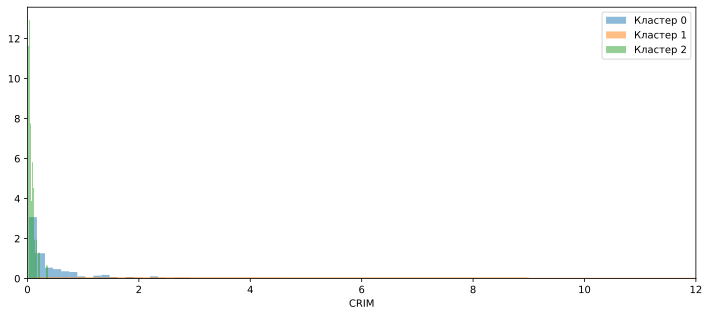

In [200]:
plt.figure(figsize = (12, 5))
plt.hist(X_train.loc[labels_train == 0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 1, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 2, 'CRIM'], bins=20, density=True, alpha=0.5)

plt.xlim(0, 12)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM')

plt.show()

### Задание 3

* Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.


* Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.



In [206]:
kmeans_test = kmeans.predict(X_test_scaled)
kmeans_test

array([0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       1, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0])

In [212]:
print('Кластер 0: {}'.format(y_test[kmeans_test == 0].mean()))
print('Кластер 1: {}'.format(y_test[kmeans_test == 1].mean()))
print('Кластер 2: {}'.format(y_test[kmeans_test == 2].mean()))

Кластер 0: price    21.860784
dtype: float64
Кластер 1: price    16.437143
dtype: float64
Кластер 2: price    31.35
dtype: float64


In [207]:
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Кластер 0: 0.26607882352941176
Кластер 1: 10.165531142857143
Кластер 2: 0.062060000000000004
